<h2 style='color:blue' align='center'>Sports Celebrity Image Classification: Data Cleaning<h2>

Special thanks to Debjyoti Paul (My data scientist friend at Amazon) for help with this project

In [20]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

#### When we look at any image, most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it.</h4>

#### Now how do you detect face and eyes?

In [21]:
img = cv2.imread('D:/vs/jupyter/political_leader_classifier/data_cleaning/Narendra_Modi_2_2.jpg')
img.shape

(800, 1200, 3)

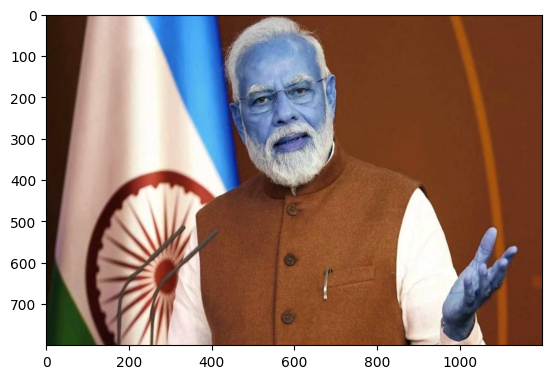

In [22]:
plt.imshow(img)

In [23]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(800, 1200)

In [24]:
gray

array([[22, 22, 22, ..., 51, 51, 51],
       [22, 22, 22, ..., 51, 51, 51],
       [22, 22, 22, ..., 51, 51, 51],
       ...,
       [27, 27, 27, ..., 43, 43, 43],
       [27, 27, 27, ..., 43, 43, 43],
       [27, 27, 27, ..., 43, 43, 43]], dtype=uint8)

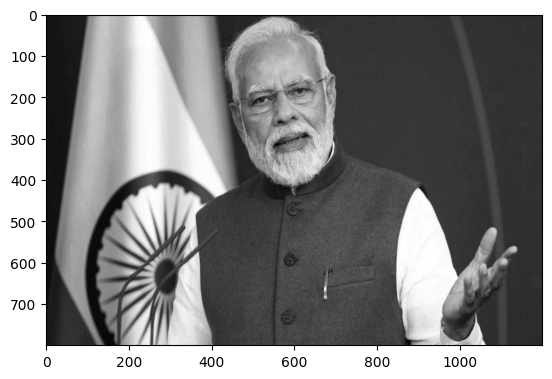

In [25]:
plt.imshow(gray, cmap='gray')

In [26]:
face_cascade = cv2.CascadeClassifier('D:/vs/jupyter/Political_leader_classifier/haar-cascade/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('D:/vs/jupyter/Political_leader_classifier/haar-cascade/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[424,  72, 314, 314]])

In [27]:
(x,y,w,h) = faces[0]
x,y,w,h

(424, 72, 314, 314)

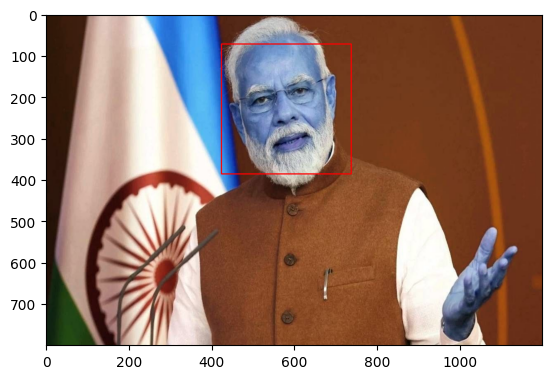

In [28]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

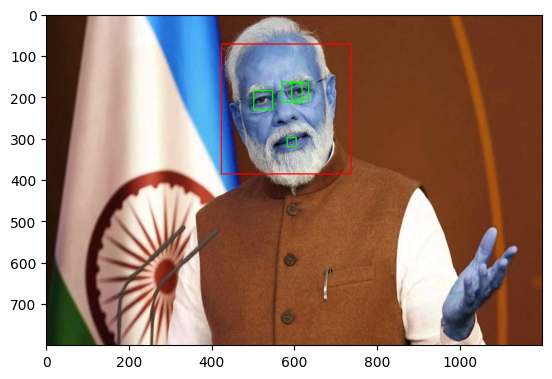

In [29]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

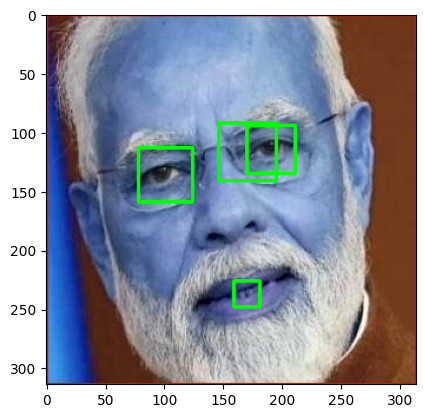

In [30]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [31]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

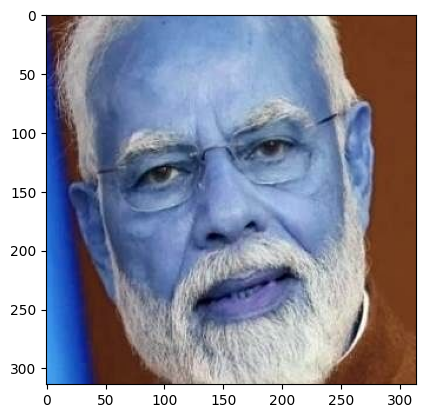

In [32]:
cropped_image = get_cropped_image_if_2_eyes('D:/vs/jupyter/political_leader_classifier/data_cleaning/Narendra_Modi_2_2.jpg')
plt.imshow(cropped_image)

In [33]:
path_to_data = "D:/vs/jupyter/dataset/political_leaders_images_data"
path_to_cr_data = "D:/vs/jupyter/dataset/political_leaders_images_data/cropped"

In [34]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [35]:
img_dirs

['D:/vs/jupyter/dataset/political_leaders_images_data\\modi',
 'D:/vs/jupyter/dataset/political_leaders_images_data\\Putin',
 'D:/vs/jupyter/dataset/political_leaders_images_data\\Rahul']

In [36]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [37]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

modi
Generating cropped images in folder:  D:/vs/jupyter/dataset/political_leaders_images_data/croppedmodi
Putin
Generating cropped images in folder:  D:/vs/jupyter/dataset/political_leaders_images_data/croppedPutin
Rahul
Generating cropped images in folder:  D:/vs/jupyter/dataset/political_leaders_images_data/croppedRahul


In [40]:
import pywt

In [41]:
def w2d(img,mode='haar',level=1):
    imarray=img
    imarray=cv2.cvtColor(imarray,cv2.COLOR_RGB2GRAY)

    imarray=np.float32(imarray)
    imarray/=255

    coeff=pywt.wavedec2(imarray,mode,level=level)
    coeff_h=list(coeff)
    coeff_h[0]*=0

    imarray_h=pywt.waverec2(coeff_h,mode)
    imarray_h*=255
    imarray_h=np.uint8(imarray_h)

    return imarray_h


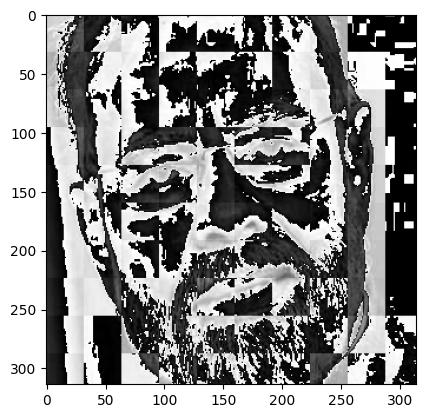

In [43]:
imhar=w2d(cropped_image,'db1',5)
plt.imshow(imhar,cmap='gray')

In [44]:
celebrity_file_names_dict

{'modi': ['D:/vs/jupyter/dataset/political_leaders_images_data/croppedmodi/modi1.png',
  'D:/vs/jupyter/dataset/political_leaders_images_data/croppedmodi/modi2.png',
  'D:/vs/jupyter/dataset/political_leaders_images_data/croppedmodi/modi3.png',
  'D:/vs/jupyter/dataset/political_leaders_images_data/croppedmodi/modi4.png',
  'D:/vs/jupyter/dataset/political_leaders_images_data/croppedmodi/modi5.png',
  'D:/vs/jupyter/dataset/political_leaders_images_data/croppedmodi/modi6.png',
  'D:/vs/jupyter/dataset/political_leaders_images_data/croppedmodi/modi7.png',
  'D:/vs/jupyter/dataset/political_leaders_images_data/croppedmodi/modi8.png',
  'D:/vs/jupyter/dataset/political_leaders_images_data/croppedmodi/modi9.png',
  'D:/vs/jupyter/dataset/political_leaders_images_data/croppedmodi/modi10.png',
  'D:/vs/jupyter/dataset/political_leaders_images_data/croppedmodi/modi11.png',
  'D:/vs/jupyter/dataset/political_leaders_images_data/croppedmodi/modi12.png',
  'D:/vs/jupyter/dataset/political_leader

In [45]:
class_dict={}

count=0

for i in celebrity_file_names_dict.keys():
    class_dict[i]=count
    count+=1
class_dict

{'modi': 0, 'Putin': 1, 'Rahul': 2}

In [46]:
x=[]
y=[]

for name,files in celebrity_file_names_dict.items():
    for file in files:
        img=cv2.imread(file)
        if img is None:
            continue
        scalled_img_raw=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        cmb_img=np.vstack((scalled_img_raw.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(cmb_img)
        y.append(class_dict[name])

In [50]:
len(x)

150

In [48]:
len(x[0])

4096

In [51]:
x=np.array(x).reshape(len(x),4096).astype(float)
x.shape

(150, 4096)

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [55]:
print(X_train.shape,X_test.shape)

(120, 4096) (30, 4096)


In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [60]:
pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])

In [61]:
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.8

In [64]:
from sklearn.metrics import classification_report  

In [65]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       1.00      0.50      0.67        10
           2       0.65      1.00      0.79        11

    accuracy                           0.80        30
   macro avg       0.88      0.80      0.80        30
weighted avg       0.87      0.80      0.79        30



In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [70]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [71]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.916667,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.716667,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.850000,{'logisticregression__C': 1}


In [72]:
best_estimators['svm'].score(X_test,y_test)

0.8666666666666667

In [73]:
best_estimators['random_forest'].score(X_test,y_test)

0.7

In [74]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9333333333333333

In [75]:
best_clf = best_estimators['svm']

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 9,  0,  0],
       [ 2,  6,  2],
       [ 0,  0, 11]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

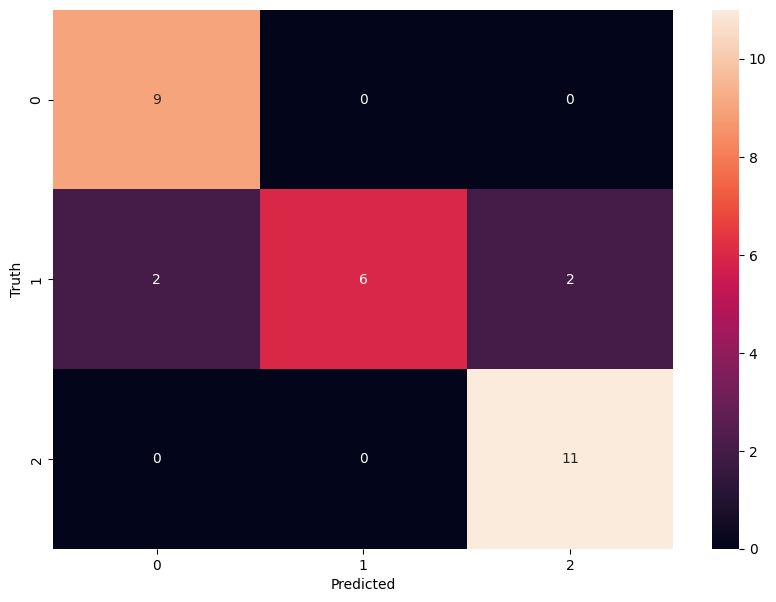

In [77]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [78]:
class_dict

{'modi': 0, 'Putin': 1, 'Rahul': 2}

In [79]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [ ]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))